In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import plotly.express as px
import os
import cv2
import numpy as np
import plotly.io as pio

# Enable Plotly for Jupyter Notebook
pio.renderers.default = "notebook"
PATH = "data\weizmann_dataset\\all_classes\\"

In [2]:
videonames = os.listdir(PATH)

In [3]:
import cv2
import mediapipe as mp
import numpy as np

video_path = PATH + videonames[19]

def process_video(path, output_size=(70, 30)):
    # Initialize MediaPipe Selfie Segmentation
    mp_selfie_segmentation = mp.solutions.selfie_segmentation
    segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=1)

    cap = cv2.VideoCapture(path)
    processed_frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame to RGB for MediaPipe processing
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Apply segmentation model
        results = segmentation.process(frame_rgb)

        # Extract mask for the person
        mask = (results.segmentation_mask * 255).astype(np.uint8) 
        
        _, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Resize the mask to the desired output size
        resized_mask = cv2.resize(mask, output_size, interpolation=cv2.INTER_NEAREST)
        # resized_mask = mask
        # Invert the mask so the person is black, background is white
        # resized_mask = cv2.bitwise_not(resized_mask)

        # Append the processed mask to the list
        processed_frames.append(resized_mask)

    cap.release()

    processed_frames_array = np.array(processed_frames)
    # print("Processing complete. The frames are stored as a numpy array")
    # print("Array shape:", processed_frames_array.shape)

    return processed_frames_array[::3]


In [4]:

# # Load the video
# video_path = PATH + videonames[19]

# def process_video(path):

#     cap = cv2.VideoCapture(path)

#     # Create a background subtractor
#     background_subtractor = cv2.createBackgroundSubtractorMOG2(history=200, varThreshold=20, detectShadows=False)
#     # background_subtractor = cv2.createBackgroundSubtractorKNN(history=150, dist2Threshold=70, detectShadows=False)

#     # Initialize a list to store the processed frames
#     processed_frames = []

#     # Loop over frames
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
        
#         downsampling_scale = 1.0
#         height, width = frame.shape[:2]        
#         # frame_resized = cv2.resize(frame, (70, 30))

#         frame_resized = cv2.resize(frame, (int(width * downsampling_scale), int(height * downsampling_scale)))

        
#         # Apply background subtraction to get the foreground mask
#         mask = background_subtractor.apply(frame_resized)

#         # Create a binary mask: white where the person is, black elsewhere
#         _, mask = cv2.threshold(mask, 50, 255, cv2.THRESH_BINARY)
        
#         # Invert the mask so the person is black, background is white
#         # mask = cv2.bitwise_not(mask)
        
#         # Append the processed mask (as a NumPy array) to the list
#         processed_frames.append(mask)

#     # Release video object
#     cap.release()

#     # Convert list of frames to a 3D numpy array
#     # Shape: (number_of_frames, height, width)
#     processed_frames_array = np.array(processed_frames)

#     # print("Processing complete. The frames are stored as a numpy array")
#     # print("Array shape:", processed_frames_array.shape)
#     return processed_frames_array

video name = shahar_walk.avi


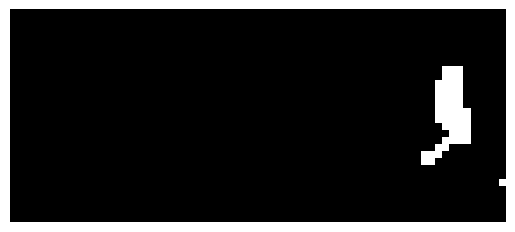

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Assuming processed_frames_array is a 3D numpy array (num_frames, height, width)
idx = 87
processed_frames_array = process_video(PATH + videonames[idx], output_size=(70, 30))
print(f"video name = {videonames[idx]}")

# Set up the figure and axis
fig, ax = plt.subplots()
ax.axis('off')  # Hide axes for cleaner video display

# Display the first frame
im = ax.imshow(processed_frames_array[0], cmap='gray', vmin=0, vmax=255)

# Update function for animation
def update(frame):
    im.set_array(processed_frames_array[frame])
    return [im]

# Create the animation
num_frames = processed_frames_array.shape[0]
ani = FuncAnimation(fig, update, frames=num_frames, blit=True, interval=50)

# Display the animation in Jupyter Notebook
HTML(ani.to_jshtml())


In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Use PillowWriter for GIF
ani.save("data/output_video.gif", writer=PillowWriter(fps=20))


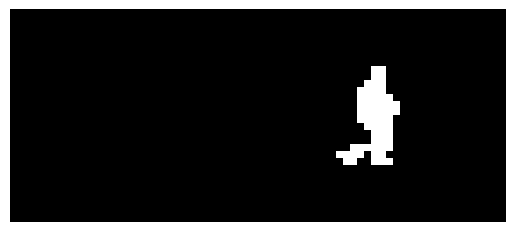

In [12]:
plt.imshow(processed_frames_array[22], cmap='gray')
plt.axis('off')
plt.show()

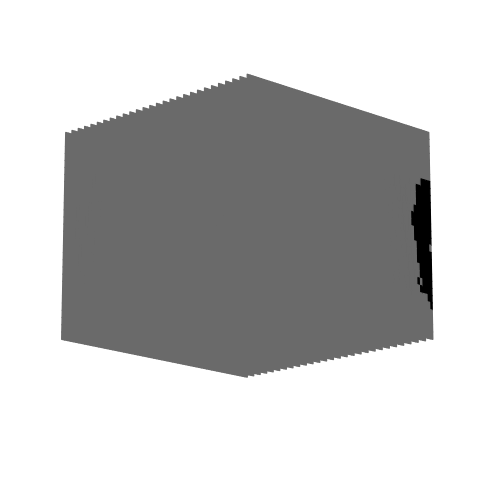

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data: 4 binary images (70x30) like silhouettes
images = 255 - processed_frames_array  # Replace with actual images

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Rotate images 90 degrees (swap height & width)
# images = np.transpose(images, (0, 2, 1)) 

# Plot each image at a different x-offset
for i in range(images.shape[0]):
    y, z = np.meshgrid(np.arange(images.shape[2]), np.arange(images.shape[1]))  # 70x30 grid
    x = np.full_like(y, i)  # Offset each image along x-axis
    ax.plot_surface(x, y, z, facecolors=plt.cm.gray(images[i]), rstride=1, cstride=1)

# Adjust view and remove axes
ax.view_init(elev=-15, azim=135)  
ax.axis("off")

plt.show()


In [14]:
num_frames, height, width = processed_frames_array.shape

remainder = num_frames % 4
padding_needed = (4 - remainder)%4

white_frame = np.full((1, height, width), 255, dtype=np.uint8) 
white_padding = np.repeat(white_frame, padding_needed, axis=0)

if padding_needed > 0:
    padded_frames = np.concatenate((processed_frames_array, white_padding), axis=0)
else:
    padded_frames = processed_frames_array

num_groups = padded_frames.shape[0] // 4
grouped_frames = padded_frames.reshape((num_groups, 4, height, width))


print("Original number of frames:", num_frames)
print("Padding added:", padding_needed)
print("Grouped frames shape:", grouped_frames.shape)


Original number of frames: 28
Padding added: 0
Grouped frames shape: (7, 4, 30, 70)


In [32]:
classwise_groups = {
    key:[] for key in ['bend', 'jack', 'jump', 'pjump', 'run', 'side', 'skip', 'walk',
       'wave1', 'wave2']

}
for idx in range(90):
    print(idx)
    processed_frames_array = process_video(PATH + videonames[idx], output_size=(25, 15))

    num_frames, height, width = processed_frames_array.shape

    padding_needed = (4 - num_frames % 4)%4

    white_frame = np.full((1, height, width), 255, dtype=np.uint8) 
    white_padding = np.repeat(white_frame, padding_needed, axis=0)

    if padding_needed > 0:
        padded_frames = np.concatenate((processed_frames_array, white_padding), axis=0)
    else:
        padded_frames = processed_frames_array

    num_groups = padded_frames.shape[0] // 4
    grouped_frames = padded_frames.reshape((num_groups, 4, height, width))
    print(grouped_frames.shape)

    classwise_groups[videonames[idx].split("_")[-1].split(".")[0]].append(grouped_frames)

classwise_groups = {key:np.concatenate(value, axis=0) for key, value in classwise_groups.items()}
    # np.savez("data\weizmann_dataset\processed_data\\"+videonames[idx].split(".")[0]+".npz",
    #          frames = processed_frames_array,
    #          label = videonames[idx].split("_")[-1].split(".")[0]
    #          )



0
(7, 4, 15, 25)
1
(8, 4, 15, 25)
2
(6, 4, 15, 25)
3
(6, 4, 15, 25)
4
(4, 4, 15, 25)
5
(5, 4, 15, 25)
6
(5, 4, 15, 25)
7
(7, 4, 15, 25)
8
(7, 4, 15, 25)
9
(7, 4, 15, 25)
10
(8, 4, 15, 25)
11
(5, 4, 15, 25)
12
(6, 4, 15, 25)
13
(5, 4, 15, 25)
14
(4, 4, 15, 25)
15
(5, 4, 15, 25)
16
(4, 4, 15, 25)
17
(6, 4, 15, 25)
18
(5, 4, 15, 25)
19
(5, 4, 15, 25)
20
(6, 4, 15, 25)
21
(5, 4, 15, 25)
22
(4, 4, 15, 25)
23
(4, 4, 15, 25)
24
(5, 4, 15, 25)
25
(4, 4, 15, 25)
26
(5, 4, 15, 25)
27
(7, 4, 15, 25)
28
(11, 4, 15, 25)
29
(5, 4, 15, 25)
30
(6, 4, 15, 25)
31
(5, 4, 15, 25)
32
(4, 4, 15, 25)
33
(4, 4, 15, 25)
34
(3, 4, 15, 25)
35
(4, 4, 15, 25)
36
(4, 4, 15, 25)
37
(4, 4, 15, 25)
38
(5, 4, 15, 25)
39
(6, 4, 15, 25)
40
(8, 4, 15, 25)
41
(6, 4, 15, 25)
42
(6, 4, 15, 25)
43
(11, 4, 15, 25)
44
(5, 4, 15, 25)
45
(6, 4, 15, 25)
46
(4, 4, 15, 25)
47
(8, 4, 15, 25)
48
(9, 4, 15, 25)
49
(10, 4, 15, 25)
50
(6, 4, 15, 25)
51
(13, 4, 15, 25)
52
(4, 4, 15, 25)
53
(5, 4, 15, 25)
54
(3, 4, 15, 25)
55
(5, 4, 15, 25

In [33]:
l = 0
for key, value in classwise_groups.items():
    print(value.shape)
    l += value.shape[0]
print(l)

(59, 4, 15, 25)
(65, 4, 15, 25)
(42, 4, 15, 25)
(49, 4, 15, 25)
(35, 4, 15, 25)
(41, 4, 15, 25)
(40, 4, 15, 25)
(58, 4, 15, 25)
(58, 4, 15, 25)
(56, 4, 15, 25)
503


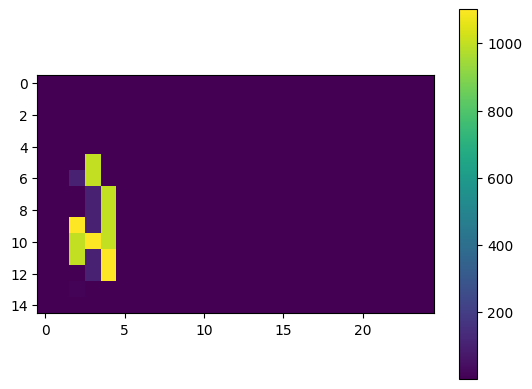

In [34]:
imgs = classwise_groups['jump'][11]/255
plt.imshow(
    (
        imgs[0]*1000+
        imgs[1]*100+
        imgs[2]*10+
        imgs[3]
    )
)
plt.colorbar()

In [35]:

np.savez("data\weizmann_dataset\processed_data\dataset.npz", **classwise_groups)

In [36]:
np.unique([videonames[idx].split("_")[-1].split(".")[0] for idx in range(90)])

array(['bend', 'jack', 'jump', 'pjump', 'run', 'side', 'skip', 'walk',
       'wave1', 'wave2'], dtype='<U5')

In [37]:
for key, value in classwise_groups.items():
    print(value.shape)

(59, 4, 15, 25)
(65, 4, 15, 25)
(42, 4, 15, 25)
(49, 4, 15, 25)
(35, 4, 15, 25)
(41, 4, 15, 25)
(40, 4, 15, 25)
(58, 4, 15, 25)
(58, 4, 15, 25)
(56, 4, 15, 25)
